# Acquisition Strategies in the IT Industry

<h2>A Brief Introduction</h2><br>
For the past few decades, the "tech dinosaurs" in the U.S. have been engaging in aggressive acquisitions of emerging businesses as a means of expanding their dominant power. Some successful acquisitions have helped them achieve their goals, while those that ended in failure impeded the growth of the business as a liability. <br><br>
Throughout this project, my goal is to <b>look into the instances of company acquisitions of big-tech enterprises, and determine how it reveals the business strategies that these enterprises have implemented in the past couple decades. </b><br><br>
Note: The 7 big-tech enterprises that I will be examining include:<br>
<blockquote>
    Apple<br>Facebook<br>Google<br>IBM<br>Microsoft<br>Twitter<br>Yahoo
</blockquote>


<h2>Project Goal and Process</h2><br>
Through deeply analyzing and exploring the data I have collected, I will methodically pursue my project goal by answering the following sub-questions:<br><blockquote>
1. How is the number of acquisitions and the company's stock prices related?<br>
2. Does there exist a significant difference in yearly average number of acquisitions between each company?<br>
3. Which industries does each company seek to expand their business in through acquisitions?<br>

<h4> Where I got my data</h4><br>
The dataset, "acquisitions.csv", which contains rich information on past company acquisitions of these 7 enterprises was obtained from Kaggle <b>(https://www.kaggle.com/shivamb/company-acquisitions-7-top-companies)</b>. <br>
The stock data was acquired through web scraping on <b>Yahoo Finance</b>. My code for web scraping is included in <b>'webscraper.py'</b>.

<h3>Overview of the Dataset</h3><br>Before we proceed with the analysis, let's take a quick look and explore our dataset, "acquisitions.csv". <b>'clean_data_acq'</b> is a file that contains functions that clean up the dataset.

In [1]:
import pandas as pd
import clean_data_acq as cd
acquisitions = pd.read_csv('acquisitions.csv')

acquisitions = cd.clean_data(acquisitions)
print(acquisitions.head())

      id  year comany_acquired                      business country  \
0  ACQ99  2015           bebop                Cloud software     USA   
1  ACQ98  2015        Fly Labs                 Video editing     USA   
2  ACQ97  2015       Clearleap  Cloud-based video management     USA   
3  ACQ96  2015      Metanautix            Big Data Analytics     USA   
4  ACQ95  2015     Talko, Inc.         Mobile communications     USA   

        products_derived parentCompany       date  
0  Google Cloud Platform        Google 2015-11-11  
1          Google Photos        Google 2015-11-11  
2                   None           IBM 2015-12-08  
3                   None     Microsoft 2015-12-18  
4                   None     Microsoft 2015-12-21  


There are 7 variables in our dataset (I have purposefully separated out the "Value (USD)" variable for later analysis):<br>
<blockquote>id<br>year<br>company_acquired<br>business<br>country<br>products_derived<br>parentCompany</blockquote><br>


The stock data is included in 'stock.csv', which is created from the function <b>stock_data()</b> in <b>clean_data_acq</b> module. As can be seen from below, the data includes stock prices in a week interval, to neglect the minor fluctuations in the stock prices.

In [2]:
stock_data = pd.read_csv('stock.csv', index_col=0)
print(stock_data.head(), '\n')
print("List of companies and counts included in our 'stock_data' datatset")
print(stock_data['company'].value_counts())

  company     price      volume        date
0   apple  0.337054  3060321600  1988-09-01
1   apple  0.334821  3563649600  1988-10-01
2   apple  0.316964  2939865600  1988-11-01
3   apple  0.334821  2946070400  1988-12-01
4   apple  0.323661  7345833600  1989-01-01 

List of companies and counts included in our 'stock_data' datatset
microsoft    421
apple        397
ibm          253
google       181
yahoo        145
facebook     109
twitter       94
Name: company, dtype: int64


<h2>Part 1: Association between Stock Prices and Acquisitions</h2>

Let us first begin by comparing each company's acquisitions and the change in stock prices over the years.

In [3]:
import stock_acquisition as stock_acq

# Creating objects that contain the acquisition and stock data for each company
apple_acq = stock_acq.Company_acq('Apple')
apple_stock = stock_acq.make_stock_object(apple_acq)

microsoft_acq = stock_acq.Company_acq('Microsoft')
microsoft_stock = stock_acq.make_stock_object(microsoft_acq)

ibm_acq = stock_acq.Company_acq('IBM')
ibm_stock = stock_acq.make_stock_object(ibm_acq)

google_acq = stock_acq.Company_acq('Google')
google_stock = stock_acq.make_stock_object(google_acq)

yahoo_acq = stock_acq.Company_acq('Yahoo')
yahoo_stock = stock_acq.make_stock_object(yahoo_acq)

facebook_acq = stock_acq.Company_acq('Facebook')
facebook_stock = stock_acq.make_stock_object(facebook_acq)

twitter_acq = stock_acq.Company_acq('Twitter')
twitter_stock = stock_acq.make_stock_object(twitter_acq)

<b>Company_acq</b> stores functionality on the data for each company's acquisitions. <b>make_stock_object()</b> creates a <b>Company_stock</b> object that stores the historical stock price data for each company. <br><br> Now, we will visualize the historical stock data along with the number of acquisitions of each company over the past few decades, using the following graphing function.
<br><br> Note: <i>Yahoo has delisted from the stock market in 2017, and thus its historical stock prices is only dated up until 2017.</i>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function that graphs historical stock prices and number of acquisitions; takes in the pyplot.axis object, 
# Company_acq object, Company_stock object, and intervals for years and acquisitions variables
def plot_stock_acq(ax1, acq_object, stock_object, x_intervals=None, y_intervals=None):

  ax1.bar(x=acq_object.get_year_range(), height=acq_object.get_year_count()['id'], color = 'lightblue', linewidth=.5, label='Acquisitions')
  ax1.set_ylabel('Number of Acquisitions', fontsize=14, color='lightblue')
  ax1.set_xlabel('Years', fontsize=12, color='grey')
  ax1.tick_params(axis='y', colors='lightblue')
  ax1.tick_params(axis='x', colors='grey')
  if y_intervals != None:
    ax1.set_yticks([int(i) for i in range(acq_object.get_year_count()['id'].min(), acq_object.get_year_count()['id'].max() + y_intervals, y_intervals)])
  plt.legend(loc="upper left")  

  ax2 = ax1.twinx()
  color='lightpink'
  ax2.plot(stock_object.get_stock_years(), stock_object.get_stock_data()['price'], color= color, linewidth=4,label='Stock Price')
  ax2.set_ylabel('Stock Price ($)', color=color, fontsize=14)
  ax2.tick_params(axis='y', colors=color)
  ax2.tick_params(axis='x', colors='grey')

  # If the stock object has greater range - this is to account for different ranges in stock and acquistions data
  if (x_intervals != None) & (stock_object.get_stock_years()[0] <= acq_object.get_min_year()):
    ax2.set_xticks(range(stock_object.get_stock_years()[0], stock_object.get_stock_years()[-1], x_intervals))
  # If the acquisition object has greater range 
  elif (x_intervals != None) & (acq_object.get_min_year() < stock_object.get_stock_years()[0]):
    ax2.set_xticks(range(acq_object.get_min_year(), stock_object.get_stock_years()[-1], x_intervals))
  plt.legend(loc="upper right")

  ax2.set_title(f"Number of Acquisitions and Stock Prices of {acq_object.get_companyName()}", fontsize=20, pad=20)


sns.set_context('talk', font_scale=1.0, rc={'grid.linewidth': 0.8})
sns.set_style('darkgrid')

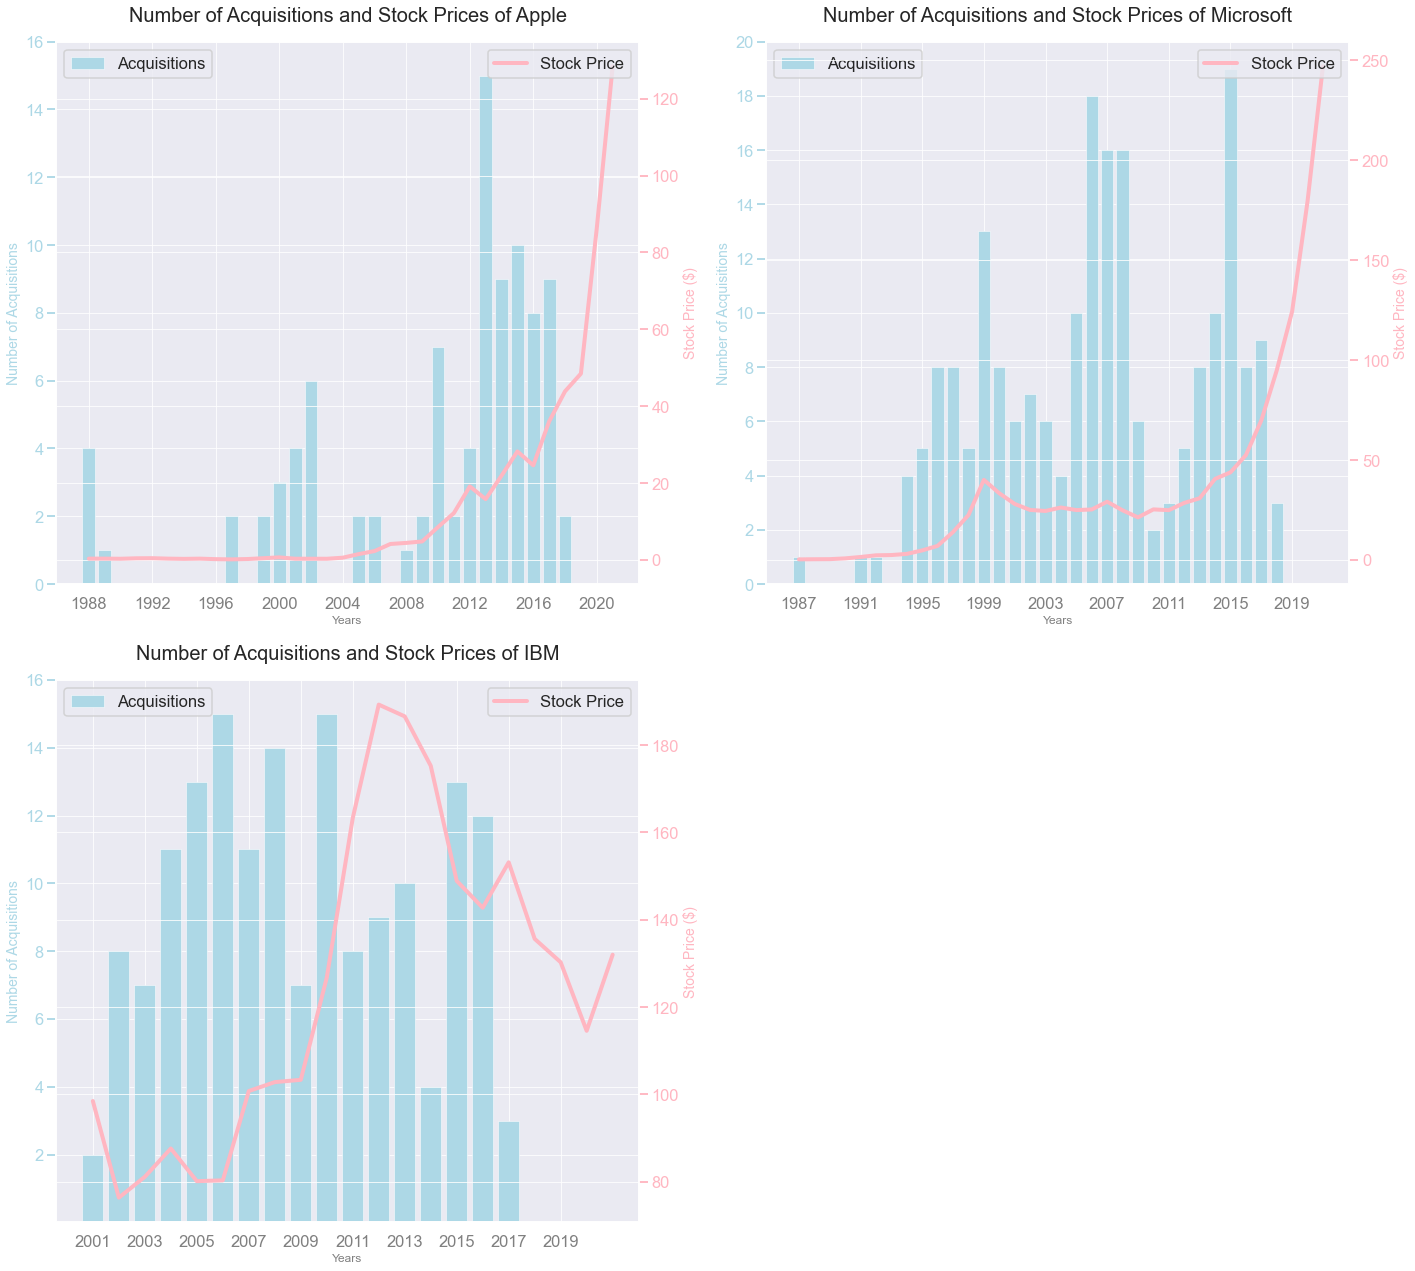

In [5]:
plt.figure(figsize=(20,18))

axis1= plt.subplot(2,2,1)
plot_stock_acq(axis1,apple_acq, apple_stock,4, 2)

axis2 = plt.subplot(2,2,2)
plot_stock_acq(axis2,microsoft_acq, microsoft_stock, 4, 2)
plt.tight_layout()

axis3 = plt.subplot(2,2,3)
plot_stock_acq(axis3, ibm_acq, ibm_stock, 2, 2)
plt.subplots_adjust(top=5.0, wspace=0.6)
plt.tight_layout()
plt.show()
plt.close()

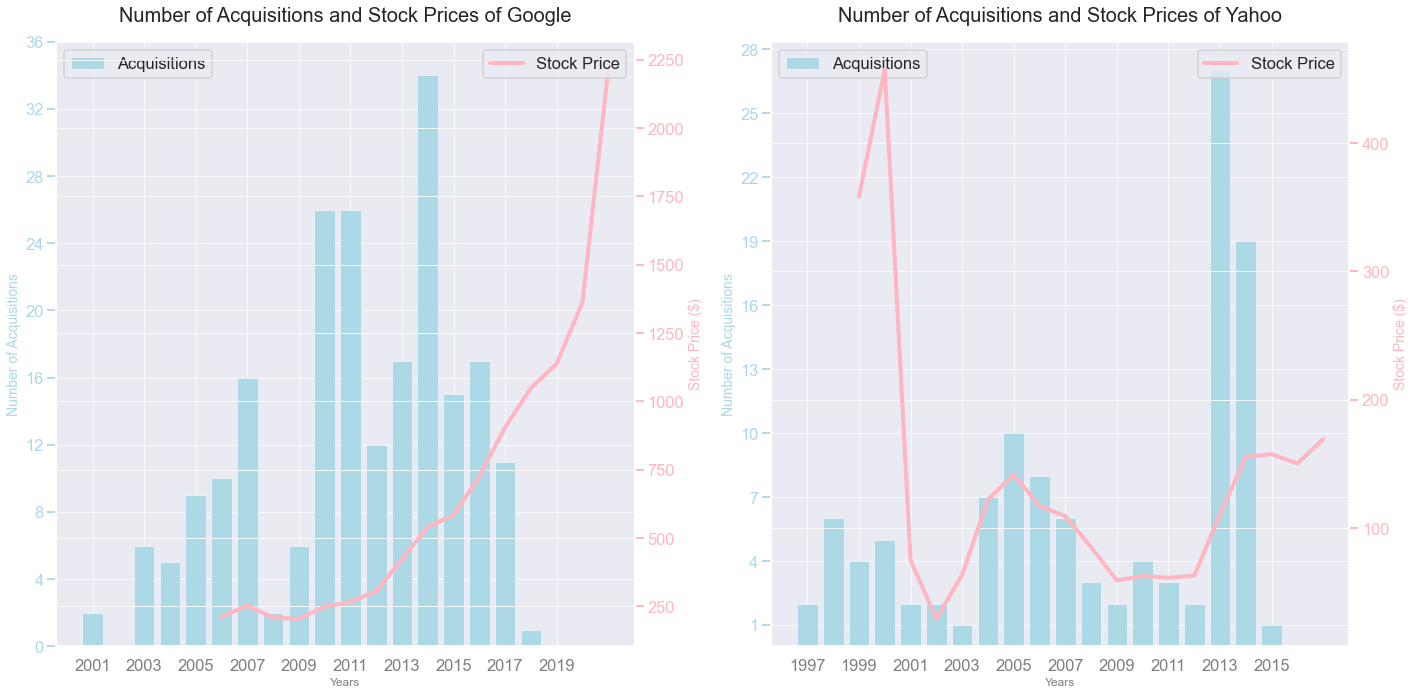

In [6]:
plt.figure(figsize=(20,10))

axis1= plt.subplot(1,2,1)
plot_stock_acq(axis1,google_acq, google_stock,2, 4)

axis2 = plt.subplot(1,2,2)
plot_stock_acq(axis2,yahoo_acq, yahoo_stock, 2, 3)

plt.subplots_adjust(top=5.0, wspace=0.6)
plt.tight_layout()
plt.show()
plt.close()

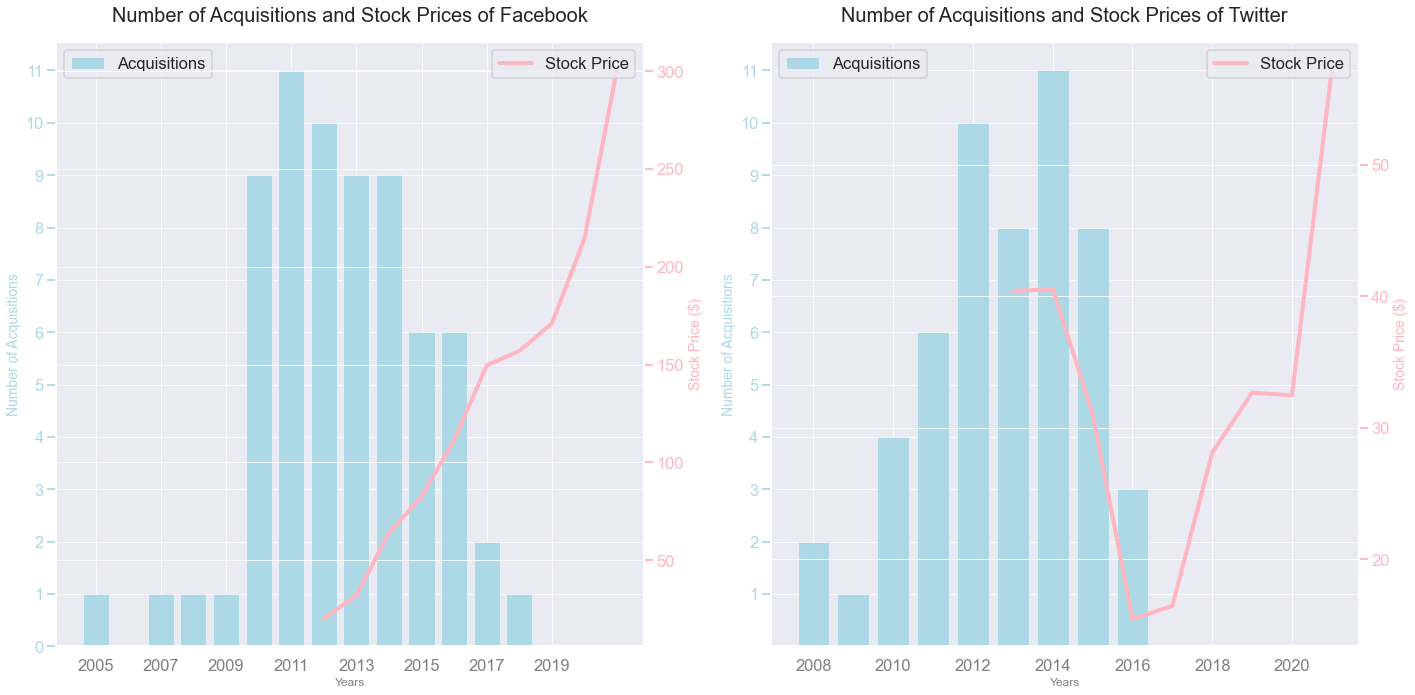

In [7]:
plt.figure(figsize=(20,10))

axis1= plt.subplot(1,2,1)
plot_stock_acq(axis1,facebook_acq, facebook_stock,2, 1)

axis2 = plt.subplot(1,2,2)
plot_stock_acq(axis2,twitter_acq, twitter_stock, 2, 1)

plt.subplots_adjust(top=5.0, wspace=0.6)
plt.tight_layout()
plt.show()
plt.close()

In these graphs, we can note the linear relationships between the number of acquisitions and stock prices in certain companies. Let's take a look at the <b>Pearson Correlation Coefficient</b> value in order to further examine the association between these two variables. <br><br> <i>The closer the value of Pearson Correlation Coefficient is to 1, the stronger the positive linear relationship between the two variables, the closer it is to 0, the weaker the relationship between the two variables, and the closer it is to -1, the stronger the negative linear relationship between the two variables.</i>

In [8]:
#Creating a dataframe that combines the stock prices data and the acquisition data
apple_combined = stock_acq.combine_stock_acq(apple_acq, apple_stock)
microsoft_combined = stock_acq.combine_stock_acq(microsoft_acq, microsoft_stock)
ibm_combined = stock_acq.combine_stock_acq(ibm_acq, ibm_stock)
google_combined = stock_acq.combine_stock_acq(google_acq, google_stock)
yahoo_combined = stock_acq.combine_stock_acq(yahoo_acq, yahoo_stock)
facebook_combined = stock_acq.combine_stock_acq(facebook_acq, facebook_stock)
twitter_combined = stock_acq.combine_stock_acq(twitter_acq, twitter_stock)

from scipy.stats import pearsonr
# Zipping the combined dataframes and company names to print out the value of the Pearson Correlation Coefficient for each company
company_names = ['Apple', 'Microsoft', 'IBM', 'Google', 'Yahoo', 'Facebook', 'Twitter']
combined_df = [apple_combined, microsoft_combined, ibm_combined, google_combined, yahoo_combined, facebook_combined, twitter_combined]
print("Pearson Correlation Coefficient between Stock Prices and Number of Acquisitions\n")
for name, each_df in zip(company_names, combined_df):
    pearson_cc = pearsonr(each_df['id'], each_df['price'])[1]
    print(f'{name}: {round(pearson_cc,4)}')

Pearson Correlation Coefficient between Stock Prices and Number of Acquisitions

Apple: 0.0005
Microsoft: 0.0219
IBM: 0.422
Google: 0.5917
Yahoo: 0.7591
Facebook: 0.0004
Twitter: 0.0797


<blockquote>• The linear relationship between the number of acquisitions and the stock prices of each company tells us how the acquistions of each company have reflected on the stock performance of the company.<br><br>
    
• We can see that for <b>Yahoo, Google, and IBM</b>, there exists a strong linear relationship between the two variables. This indicates that there exists a strong  correlation between the acquisitions of start-ups and smaller companies and the stock performance of these tech enterprises. <br>
  <blockquote><i>In other words, an increase in the number of acquisitions in a specific year led to an increase in stock prices, and a decrease in the number of acquisitions has led to a decrease in stock prices in these companies. This shows the possibility that these companies have aggressive acquisition strategies that result in a heavy influence on their stock performances.</i></blockquote>
• On the other hand, the low correlation coefficient values of <b>Apple, Microsoft, Facebook, and Twitter</b> suggests that there seems to be almost no correlation between the acquisitions of companies and stock performances of these tech enterprises.
    <blockquote><i>This could be interpreted as that the stock performances of these companies are not really influenced by their acquisition strategies, and they do not take as dramatic a measure in acquiring and merging emerging businesses.</i></blockquote>
</blockquote>

<h2>Part 2: Significant Differences in Yearly Average Number of Acquisitions Between the Tech Enterprises

In this step, we will look into how the number acquisitions between each company differ from one another, and if this difference is significant enough to detect different acquisition strategies in each company. In prior to proceeding with the analysis, I will put forward my hypothesis:<br>
<blockquote>I hypothesize that there exists a significant difference between <b>the yearly average number of acquisitions</b> between each company.</blockquote>
Let's begin by taking a look at the number of acquisitions of each company. Since the dataset includes different ranges of years of acquisitions of each company, we will use the yearly mean number of acquisitions in order to take into account the confounding variable. <br><br><i>(For instance, apple has been acquiring companies for 31 years, and its total number of acquisitions is far greater than that of Twitter, a relatively young company, that has been acquiring companies for 8 years. However, yearly average in number of acquisitions for Twitter is much greater than that of Apple.)</i>

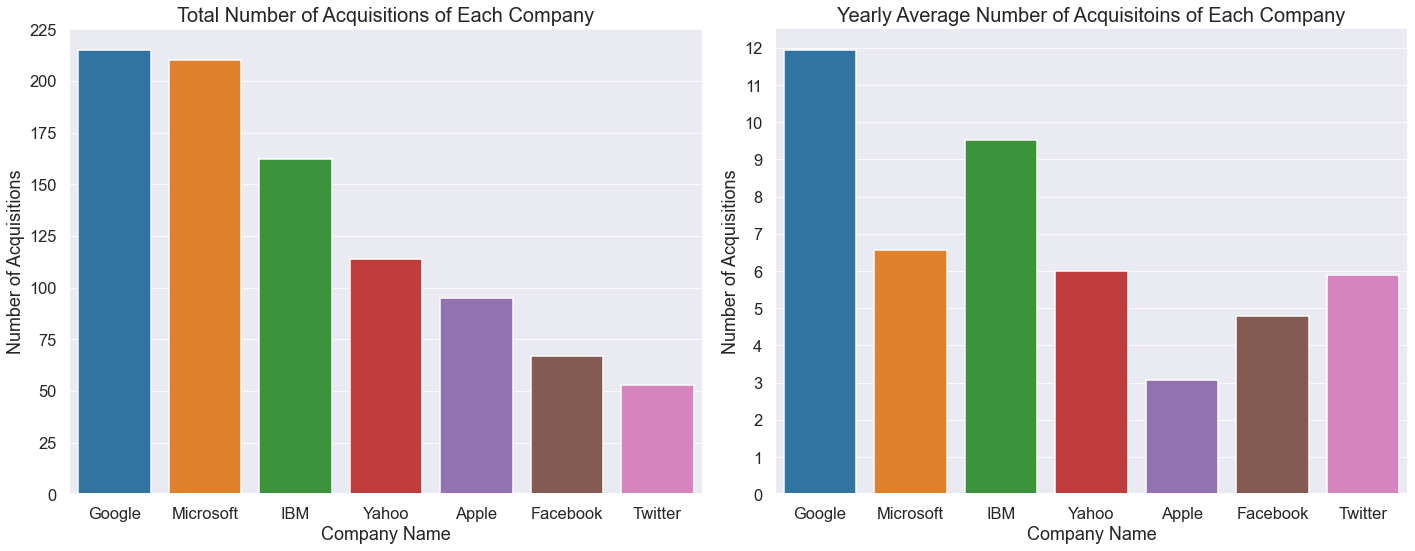

In [9]:
# Calculating the different ranges of acquisition history for each company
apple_years = len(apple_acq.get_year_range())
facebook_years = len(facebook_acq.get_year_range())
google_years = len(google_acq.get_year_range())
ibm_years = len(ibm_acq.get_year_range())
microsoft_years = len(microsoft_acq.get_year_range())
twitter_years = len(twitter_acq.get_year_range())
yahoo_years = len(yahoo_acq.get_year_range())

# Creating a new dataframe 'grouped' that groups each company with the number of acquisitions in sorted order
grouped = acquisitions.groupby('parentCompany').id.count().reset_index()
list_years = [apple_years, facebook_years, google_years, ibm_years, microsoft_years, twitter_years, yahoo_years]
grouped['years'] = list_years
grouped['yearly_acquisitions'] = grouped.apply(lambda x: x.id / x.years, axis=1)
grouped = grouped.sort_values(by=['id'], ascending=False).reset_index(drop=True)


sns.set_context('talk', font_scale=1.0, rc={'grid.linewidth': 0.8})
sns.set_style('darkgrid')

# Plotting a bar graph to show the number of acquisitions and yearly mean number of acquisitions of each company
plt.figure(figsize=(20,8))
ax1 = plt.subplot(1,2,1)
sns.barplot(data = grouped, x='parentCompany', y = 'id')
ax1.set_xlabel("Company Name")
ax1.set_ylabel("Number of Acquisitions")
ax1.set_title("Total Number of Acquisitions of Each Company", fontsize=20)
ax1.set_yticks(range(0,250, 25))

ax2 = plt.subplot(1,2,2)
sns.barplot(data=grouped, x='parentCompany', y='yearly_acquisitions')
ax2.set_xlabel("Company Name")
ax2.set_ylabel("Number of Acquisitions")
ax2.set_title("Yearly Average Number of Acquisitoins of Each Company", fontsize=20)
ax2.set_yticks(range(0,13, 1))
plt.tight_layout()
plt.show()

<blockquote>• From the graph "Total Number of Acquisitions of Each Company, we can see that <b>Google</b> and <b>Microsoft</b> have notably higher number of acquisitions compared to others. <br><br>
    • However, when we take the range of years in each company into account, <b>Google</b> and <b>IBM</b>, not <b>Microsoft</b> has higher yearly average number of acquisitions compared to other companies. This indicates that Microsoft has accumulated a huge number of acquisitions over a long period of time, whereas IBM has done so in a much shorter period of time than did Microsoft.<br><br>
    • We can also note that <b>Apple</b> has notably small yearly average number of acquisitions when compared to other companies. Even though Apple has the longest history (31 years) among these 7 enterprises, it has the lowest yearly average number of acquisitions.<br><br>
    • Even though <b>Twitter</b> has lowest total number of acquisitions among the 7 enterprises due to its short history (12 years), it exceeds Facebook and Apple in yearly average number of acquisitions, meaning it has taken a more daunting measure in acquiring emerging businesses than these two tech giants.  
</blockquote>
Now, let's use the <b>ANOVA test</b> to see if there exists a significance difference between the yearly average number of acquisitions between each company.<br> Using the ANOVA test and a significance level of 0.05, our null hypothesis is: <blockquote><b>"There does not exist a significance difference in yearly mean number of acquisitions between each company".</blockquote><br><br>

In [10]:
from scipy.stats import f_oneway

fstat, pval = f_oneway(apple_acq.get_year_count()['id'], facebook_acq.get_year_count()['id'], google_acq.get_year_count()['id'], ibm_acq.get_year_count()['id'], microsoft_acq.get_year_count()['id'], twitter_acq.get_year_count()['id'], yahoo_acq.get_year_count()['id'])
print(f"The p-value of the ANOVA test is {pval}")

The p-value of the ANOVA test is 2.2652289218830128e-05


<blockquote>Since the p-value of the ANOVA test 2.2652e-05 is smaller than our significance threshold of 0.05, we reject the null hypotehsis and conclude that <b>"there does exist a significance difference in yearly mean number of acquisitions between each company.</b></blockquote> Now, let's look take a look at which pairs of companies have a significant diffrence in yearly number of acquisitions.

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

all_companies = pd.concat([apple_acq.get_year_count(), facebook_acq.get_year_count(), google_acq.get_year_count(), ibm_acq.get_year_count(), microsoft_acq.get_year_count(), twitter_acq.get_year_count(), twitter_acq.get_year_count(), yahoo_acq.get_year_count()])
print(pairwise_tukeyhsd(all_companies['id'],all_companies['company'], 0.05))

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower    upper  reject
-----------------------------------------------------------
    apple  facebook   1.7212    0.9   -3.604  7.0463  False
    apple    google   8.8799  0.001   3.9793 13.7806   True
    apple       ibm   6.4649  0.003   1.4739 11.4559   True
    apple microsoft    3.498 0.1635  -0.6696  7.6656  False
    apple   twitter   2.8244 0.5874  -2.0763   7.725  False
    apple     yahoo   2.9355 0.5303  -1.8829  7.7538  False
 facebook    google   7.1587  0.007   1.2656 13.0518   True
 facebook       ibm   4.7437  0.216  -1.2248 10.7122  False
 facebook microsoft   1.7768    0.9  -3.5224   7.076  False
 facebook   twitter   1.1032    0.9  -4.7899  6.9963  False
 facebook     yahoo   1.2143    0.9  -4.6106  7.0392  False
   google       ibm   -2.415 0.8383   -8.008   3.178  False
   google microsoft  -5.3819 0.0202 -10.2544 -0.5095   True
   google   twitter  -6.0556 0.0213 -11.

From the <b>Tukey's Range Test</b>, we could see that there exists a significant difference between:
<blockquote>Apple -- Google <br>
    Apple -- IBM <br>
    Facebook -- Google <br>
    Google -- Microsoft <br>
    Google -- Twitter <br>
    Google -- Yahoo <br><br>

• The results of Tukey's Range Test tell us that Apple employed a different strategy than did Google and IBM in acquiring the companies. While Apple only focused on the notably small number of acquisitions throughout its history, Google and IBM have acquired a significantly higher number of companies when compared to Apple. <br><br>• Google, especially, dominates other tech enterprises when it comes to the number of acquisitions. Apart from IBM, which ranks second in yearly average number of acquisitions, Google's yearly average number of acquisitions is significantly higher than that of all the other companies, which demonstrates Google's agressive acquisition strategy to expand its business. 
        </blockquote>
    </blockquote>

<h2>Part 3: Analysis on the Top Business Acquisitions for Each Company</h2>

Now we will inspect the top business acquisitions for each company according to the amount of money spent on acquisitions in descending order. Furthermore, we will also take a look into the top 5 industries that most acquisitions for each company belong to. <br><br>
Note: <i>Since some acquisitions of the companies were not proceeded publicly, the amount of money spent on the acquisition is not open to the public. We will focus on the public acquisitions of each company, and thus will need to take account the fact that we were not able to include the private acquisitions of some companies.</i>

In [12]:
sns.set_context('poster', font_scale=1, rc={'grid.linewidth': 0.8})
sns.set_style('darkgrid')

<h3> Google's Top Acquisitions and Business Categories</h3>

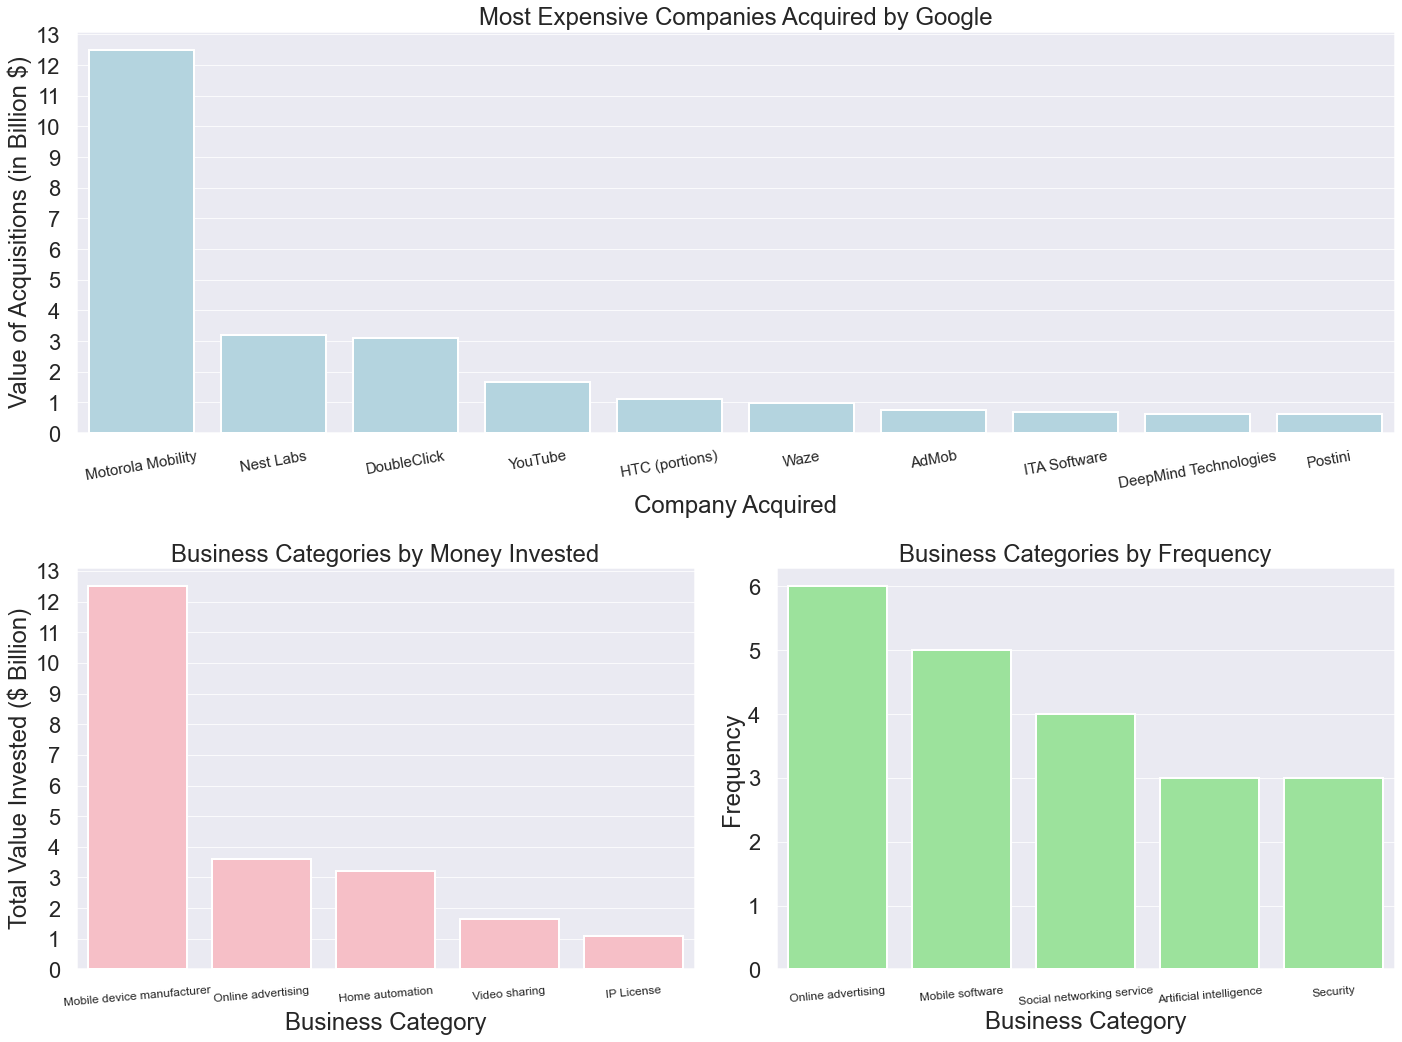

In [13]:
plt.figure(figsize=(20,15))

ax1 = plt.subplot(2,1,1)
stock_acq.top_ten_acq('Google', ax1)
plt.tick_params(axis='x', labelsize=15)
plt.xticks(rotation=10)

ax2 = plt.subplot(2,2,3)
stock_acq.business_categories_by_value('Google', ax2)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=5)

ax3 = plt.subplot(2,2,4)
stock_acq.business_categories_by_frequency('Google', ax3)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=5)
plt.tight_layout()

plt.show()
plt.close()

<blockquote> • The biggest purchase by Google turns out to be <b>Motorola Mobility</b>, with the acquisition value of approximately \$12.5 billion. Acquisition of Motorola Mobility by Google in 2012 shows Google's ambition to extend its power over the smartphone industry; the ownership was short-lived as Google sold it to the Chinese technology company Lenovo for \$2.91 billion in 2014.<br><br>
    • We can see that among the top acquisitions of Google situates two smartphone companies (<b>Motorola Mobility, HTC</b>), and that Google has been acquiring numerous <b>Mobile Software</b> companies as well. Clearly, Google has been trying to reinforce its mobile technology through such acquisitions. <br><br>
    • <b>Youtube</b> was acquired by Google for \$1.65 billion in 2006; this turned out to be one of the most successful business acquisitions in the history of IT industry, as Youtube has grown into an enormously profitable company that has made a revenue of $20 billion in 2020 alone. <br><br>
    • The acquisitions of <b>Nest Labs</b>, an IoT company, and <b>artificial intelligence</b> companies clearly demonstrates the acquisition strategy of Google, which is to acquire companies with newest technologies in emerging industries, such as IoT and AI.

<h3>Microsoft's Top Acquisitions and Business Categories</h3>

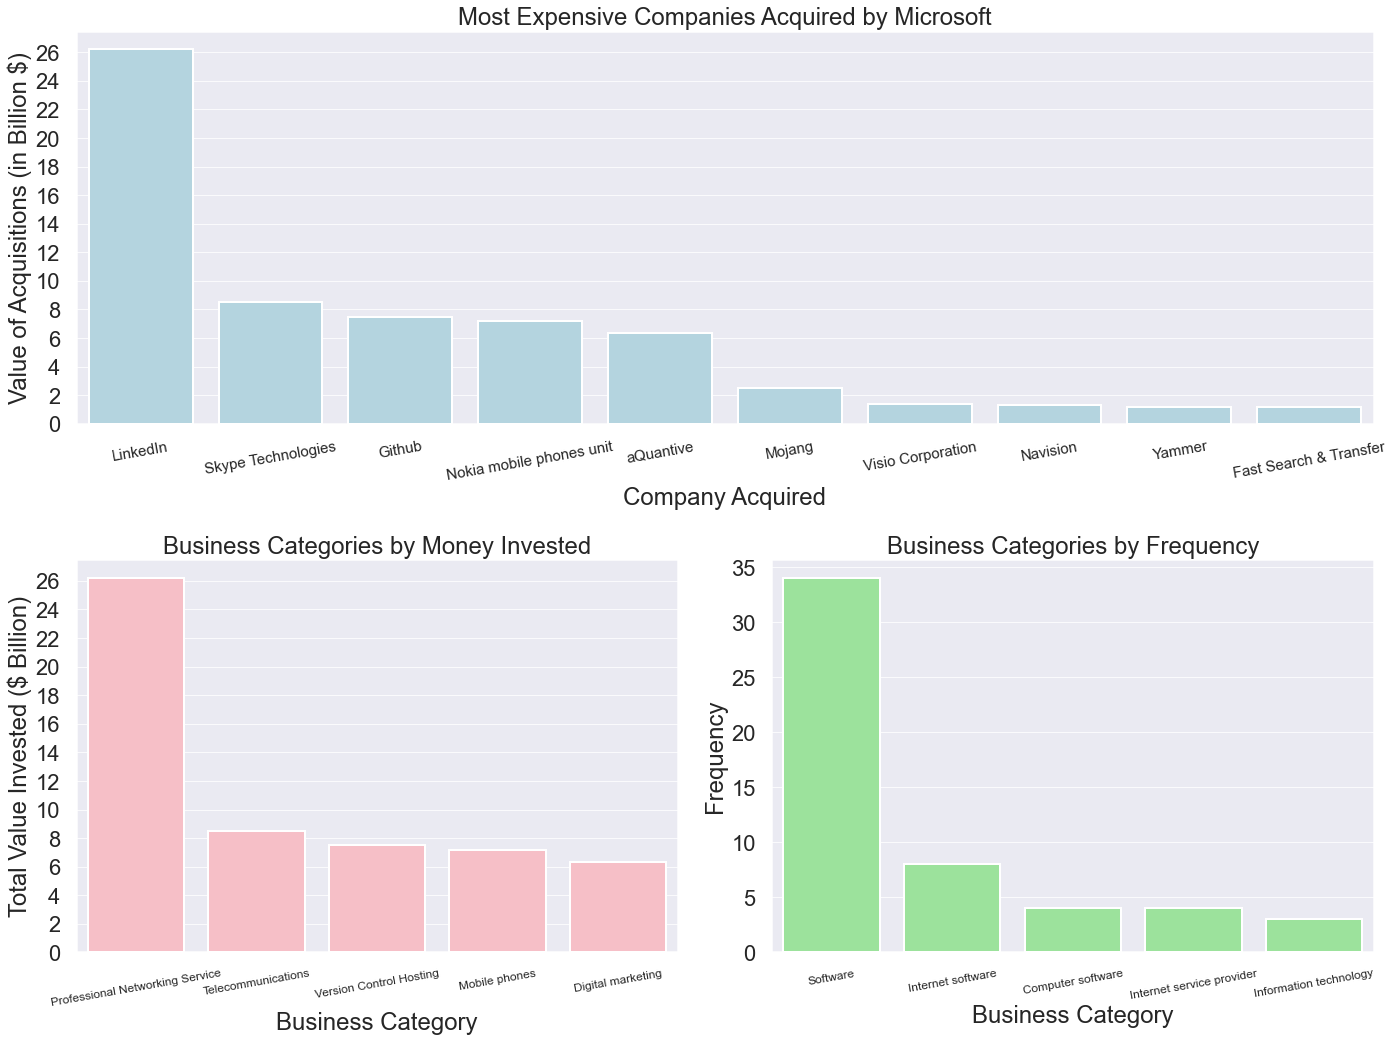

In [14]:
plt.figure(figsize=(20,15))

ax1 = plt.subplot(2,1,1)
stock_acq.top_ten_acq('Microsoft', ax1)
plt.tick_params(axis='x', labelsize=15)
plt.xticks(rotation=10)

ax2 = plt.subplot(2,2,3)
stock_acq.business_categories_by_value('Microsoft', ax2)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=10)

ax3 = plt.subplot(2,2,4)
stock_acq.business_categories_by_frequency('Microsoft', ax3)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=10)
plt.tight_layout()

plt.show()
plt.close()

<blockquote> • The biggest acquisition that Microsoft has made in <b>LinkedIn</b>, which was acquired for a record price of \$26.2 billion in 2016. LinkedIn makes yearly revenue of around $7 billion (2019), and more importantly, it demonstrates Microsoft's business strategy to solidify its dominant power in B2B software market, as a professional networking service platform such as LinkedIn could bring in huge number of professional workers into Microsoft's ecoyststem.<br><br>
    • Microsoft acquired <b>Nokia's mobile phones unit</b> for \$7.2 billion in 2013. This shows Microsoft's attempt to expand its business in the smartphones industry, which eventually ended in failure and forced Microsoft to relinquish its ownership in 2016 for \$350 million.<br><br>
    • We can see that Microsoft has been focusing in acquiring numerous <b>Software</b> companies in particular, including <b>Internet software, and Computer software</b> companies, as a result of its failure to expand its business in mobile phones and hardware businesses (Tablets such as Microsoft Surface turned out to be a huge failure and cost the company an enormous sum of money).<br><br>
    • Microsoft's business strategy concentrates on Software technologies on PC, and its strength lies upon B2B office softwares. The recent history of Microsoft's acquisitions very well reveals its intention to draw more users into its ecosystem, which has been well established for decades, and is on the track of solidifying its dominance over B2B software market after its failure in mobile phone and hardware businesses.

<h3>IBM's Top 5 Acquisitions and Business Categories</h3>

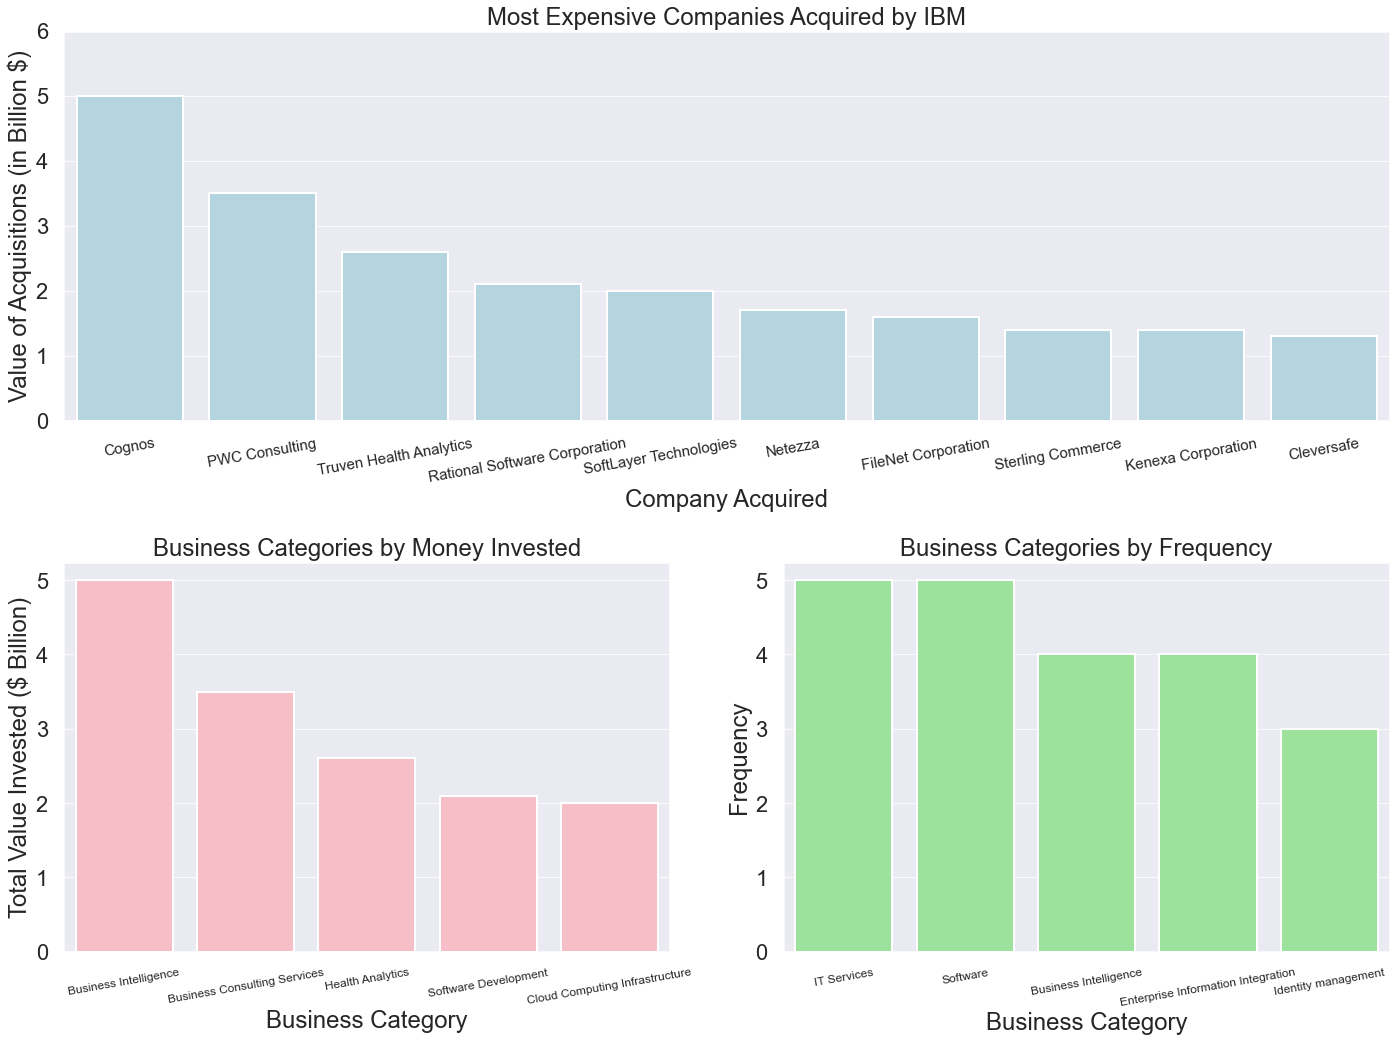

In [15]:
plt.figure(figsize=(20,15))

ax1 = plt.subplot(2,1,1)
stock_acq.top_ten_acq('IBM', ax1)
plt.tick_params(axis='x', labelsize=15)
plt.xticks(rotation=10)

ax2 = plt.subplot(2,2,3)
stock_acq.business_categories_by_value('IBM', ax2)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=10)

ax3 = plt.subplot(2,2,4)
stock_acq.business_categories_by_frequency('IBM', ax3)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=10)
plt.tight_layout()

plt.show()
plt.close()

<blockquote> • The biggest acquisition made by IMB is <b>Cognos</b>, which was acquired for $5 billion in 2008. Cognos is a company that focuses on business analytics and helps client companies grow their business. <br><br>
    • IBM was the pioneer in Personal Computer market in 1980s, shortly losing its dominant position to other competitors in 1990s. Its strategy now focuses on B2B software and consulting, as can be seen from its top acquisitions. Out of top 10 acquisitions, 6 companies engage in B2B model(<b>Cognos, PWC Consulting, Netezza, FilNet Corporation, Sterling Commerce, and Cleversafe</b>), which shows IBM's strategy to engage in B2B market rather than 2C market.<br><br>
    • The acquisition of <b>Truven Health Analytics</b> shows IBM's attempt in expanding its business in health analytics, which is expected to grow to \$51.5 billion by 2027. The acquisition has aided the company in developing a well-known product <b>Watson Health</b>.<br><br>
    • Most of IBM's acquisitions are concentrated on big data analytics and business consulting, with the incorporation of cloud computing as well. Its business strategy also seemingly expands to healthy analytics in addition to gaming industry.

<h3>Yahoo's Top Acquisitons and Business Categories</h3>

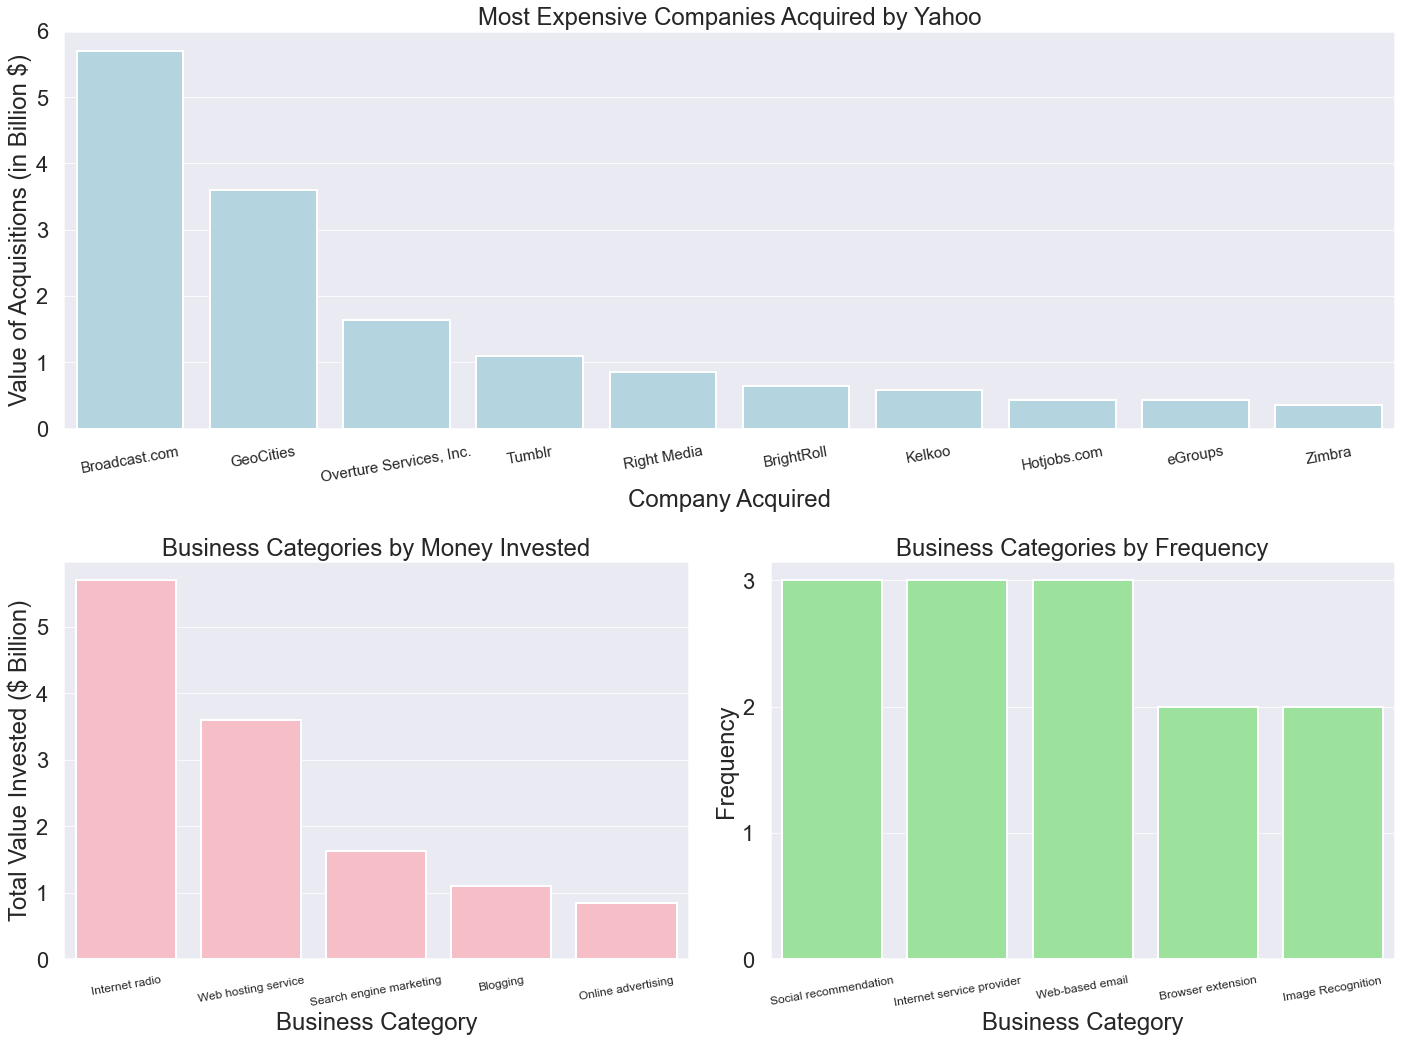

In [16]:
plt.figure(figsize=(20,15))

ax1 = plt.subplot(2,1,1)
stock_acq.top_ten_acq('Yahoo', ax1)
plt.tick_params(axis='x', labelsize=15)
plt.xticks(rotation=10)

ax2 = plt.subplot(2,2,3)
stock_acq.business_categories_by_value('Yahoo', ax2)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=10)

ax3 = plt.subplot(2,2,4)
stock_acq.business_categories_by_frequency('Yahoo', ax3)
ax3.set_yticks(range(0,4,1))
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=10)
plt.tight_layout()

plt.show()
plt.close()

<blockquote> • The acquisition of <b>Broadcast.com</b>, an Internet radio company, in 1999 was the biggest purchase of Yahoo with about \$5.7 billion. The acquisition took place in Dot-com bubble era, meaning the company was acquired at a way higher value than its real intrinsic value. Instead of becoming an asset, this acquisition turned out to be a huge liability, resulting in an enormous loss of revenue for the parent company.<br><br>
    • The acquisitions of Overture services, and Kelkoo were intended to reinforce the profitability of search engine of Yahoo, which became the main source of revenue for the parent company.<br><br>
    • Out of the top 5 acquisitions, 4 of them excluding Overture services ended in failure, leading to the collapse of the company. The top 2 most expensive acquisitions, <b>Broadcast.com and GeoCities</b> were proceeded during the Dot-com bubble period, and <b>Tumblr and Right Media</b> also shut down its business without making a clear growth in revenue for Yahoo.<br><br>
    • Yahoo's business strategy focused on growing its business through acquiring other various platforms such as Internet radio, blogging, social media, and so on. A lot of them ended in failure, part due to the period of time when they were acquired, and part due to the lack of insight in examining the profitability and marketability of the acquisition.

<h3>Apple's Top 5 Acquisitions and Business Categories</h3>

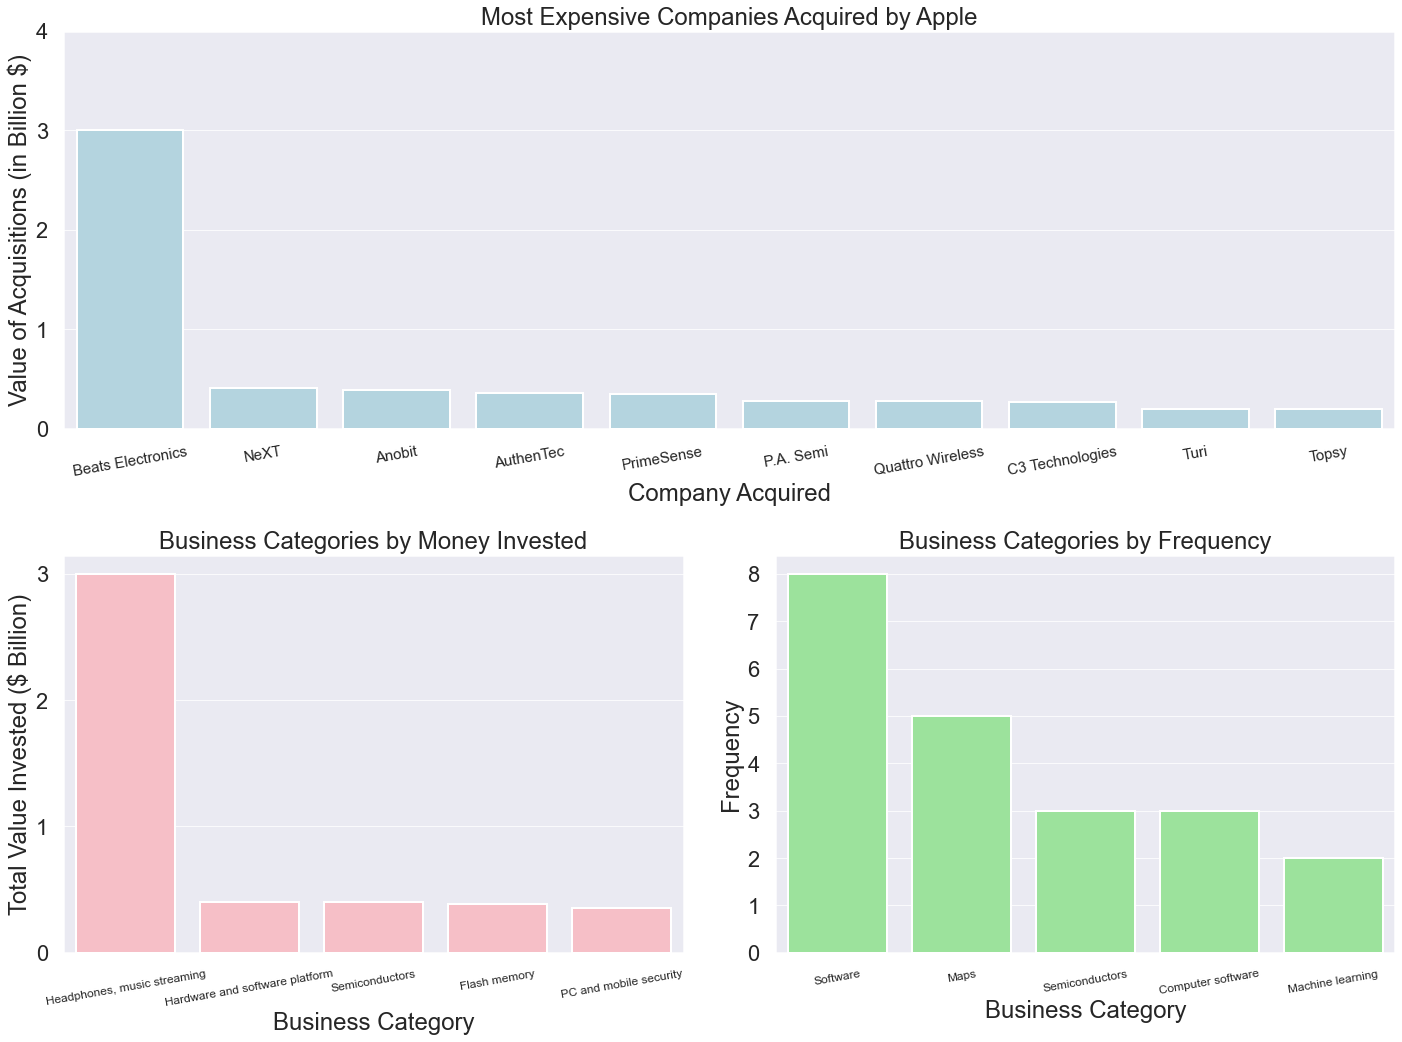

In [17]:
plt.figure(figsize=(20,15))

ax1 = plt.subplot(2,1,1)
stock_acq.top_ten_acq('Apple', ax1)
plt.tick_params(axis='x', labelsize=15)
plt.xticks(rotation=10)

ax2 = plt.subplot(2,2,3)
stock_acq.business_categories_by_value('Apple', ax2)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=10)

ax3 = plt.subplot(2,2,4)
stock_acq.business_categories_by_frequency('Apple', ax3)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=10)
plt.tight_layout()

plt.show()
plt.close()

<blockquote> • Apple's biggest acquisition is <b>Beats Electronics</b> in 2014, which amounts to \$3 billion. Considering the size and the amount of revenue that Apple makes one year ($183 billion in 2014), Apple has not invsted so much money in acquiring companies. <b>Beats Electronics</b>, however, may be one of the most successful acquisitions of Apple, since it influenced the creation of new iPhones, iTunes, and Apple Music, indirectly generating billions of dolalrs in revenue.<br><br>
    • <b>NeXT</b> was acquired by Apple in 1997 for \$404 million, and it also may be on the most successful acquisitions in its history. The acquisitoin of the company led to the creation of software products such as MacOS, iOS, watchOS, which has allowed Apple to become one of the most profitable enterprise in this generation.<br><br>
     •Apple has acquired numerous <b>Semiconductors, Hardware, and Memory</b> companies, which demonstrates Apple's identity as a hardware company, along with its strength in software and content platform as well.<br><br> 
    • Apart from <b>Beats Electronics</b>, Apple did not make an acquisition that cost more than \$1 billion, which shows Apple's inactivity in acquiring companies. Despite of its sporadicity, Apple has made successful acquisitions that led to the creation of lucrative products with a low cost.<br><br>


<h3>Facebook's Top 5 Acquisitions and Business Categories</h3>

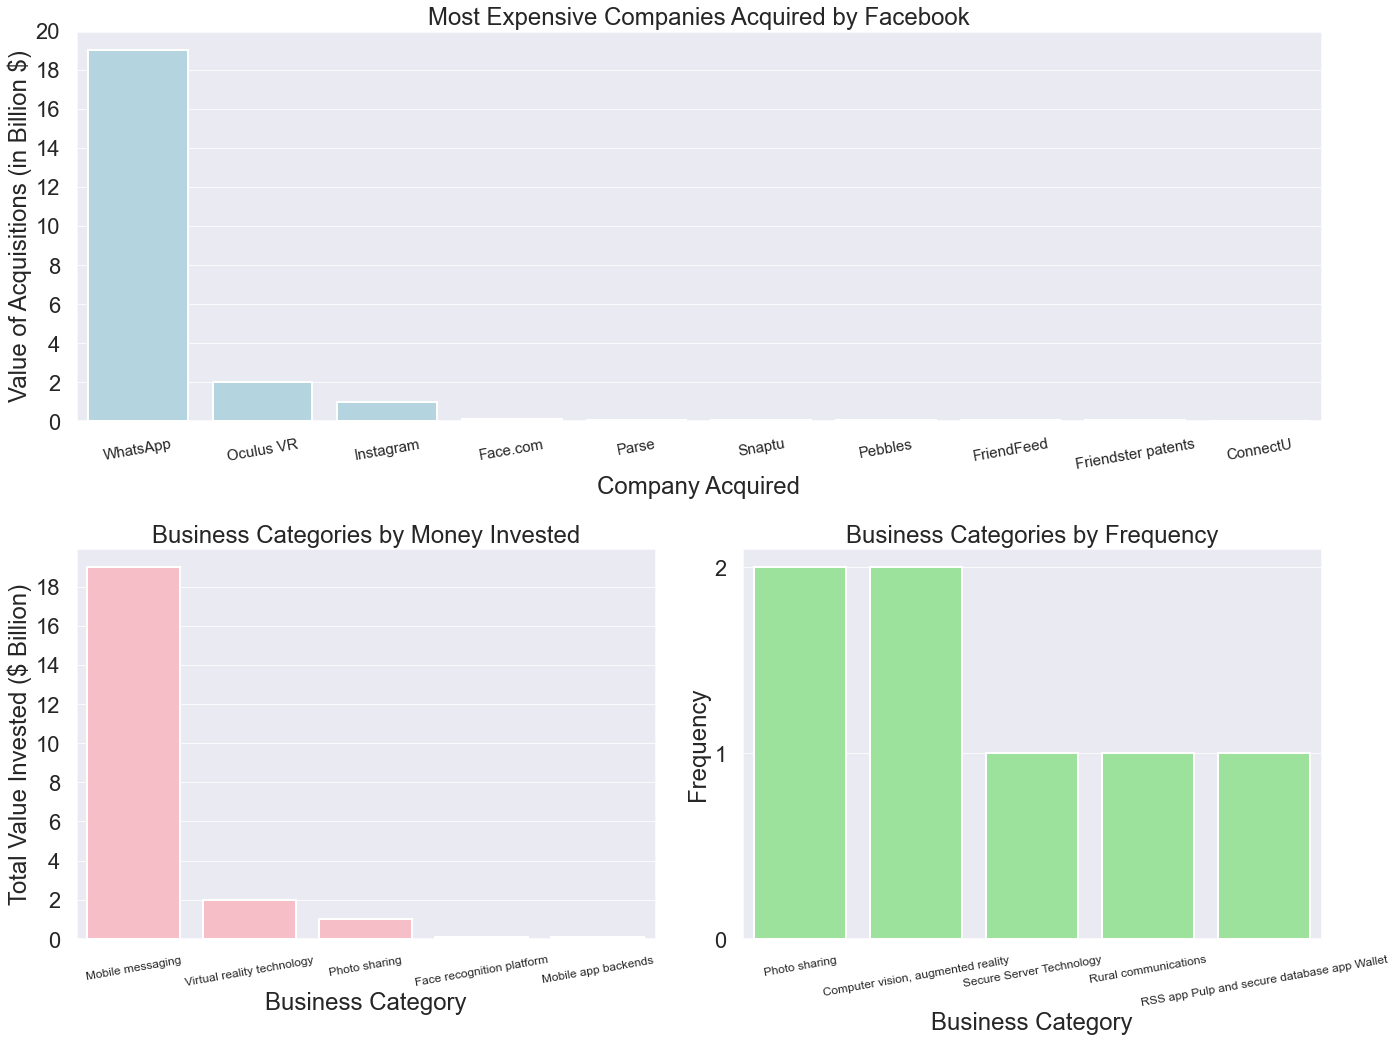

In [18]:
plt.figure(figsize=(20,15))

ax1 = plt.subplot(2,1,1)
stock_acq.top_ten_acq('Facebook', ax1)
plt.tick_params(axis='x', labelsize=15)
plt.xticks(rotation=10)

ax2 = plt.subplot(2,2,3)
stock_acq.business_categories_by_value('Facebook', ax2)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=10)

ax3 = plt.subplot(2,2,4)
stock_acq.business_categories_by_frequency('Facebook', ax3)
ax3.set_yticks(range(0,3,1))
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=10)
plt.tight_layout()

plt.show()
plt.close()

<blockquote> • The biggest acquisition of Facebook is <b>WhatsApp</b>, which was purhcased for \$19 billion in 2014. No other acquisition other than the acquisition of Whatsapp is greater than \$3 billion, meaning that a huge portion of Facebook's investment was concentrated in this single mobile messaging company.<br><br>
    • Money invested in the acquisitions of <b>WhatsApp and Instagram</b> consist most of the total amount invested in acquisitions for Facebook. This trait very well displays Facebook's acquisition strategy as these two companies are social media companies, a counterpart of Facebook itself, one that engages in mobile messaging and the other in photo sharing. This can be interpreted as Facebook has expanded its dominance in the social media industry by merging its rival companies in the industry.<br><br>
    • Notably, <b>Instagram</b>, which was acquired for \$1 billion in 2012, has made $14 billion in revenue in 2019 alone, and is dominantly the most prevalent social media platform today. This very well represents the success of Facebook's strategy in merging its rival companies in the same industry.<br><br>
    • Facebook's acquisition stratey also focuses on expanding onto future business as well, which is represented by the acquisition of Oculus VR in 2014. Facebook intends to expand its power as a social platform in the future business industry of <b>metaverse</b> by absorbing the VR technology.

<h3>Twitter's Top 5 Acquisitions and Business Categories

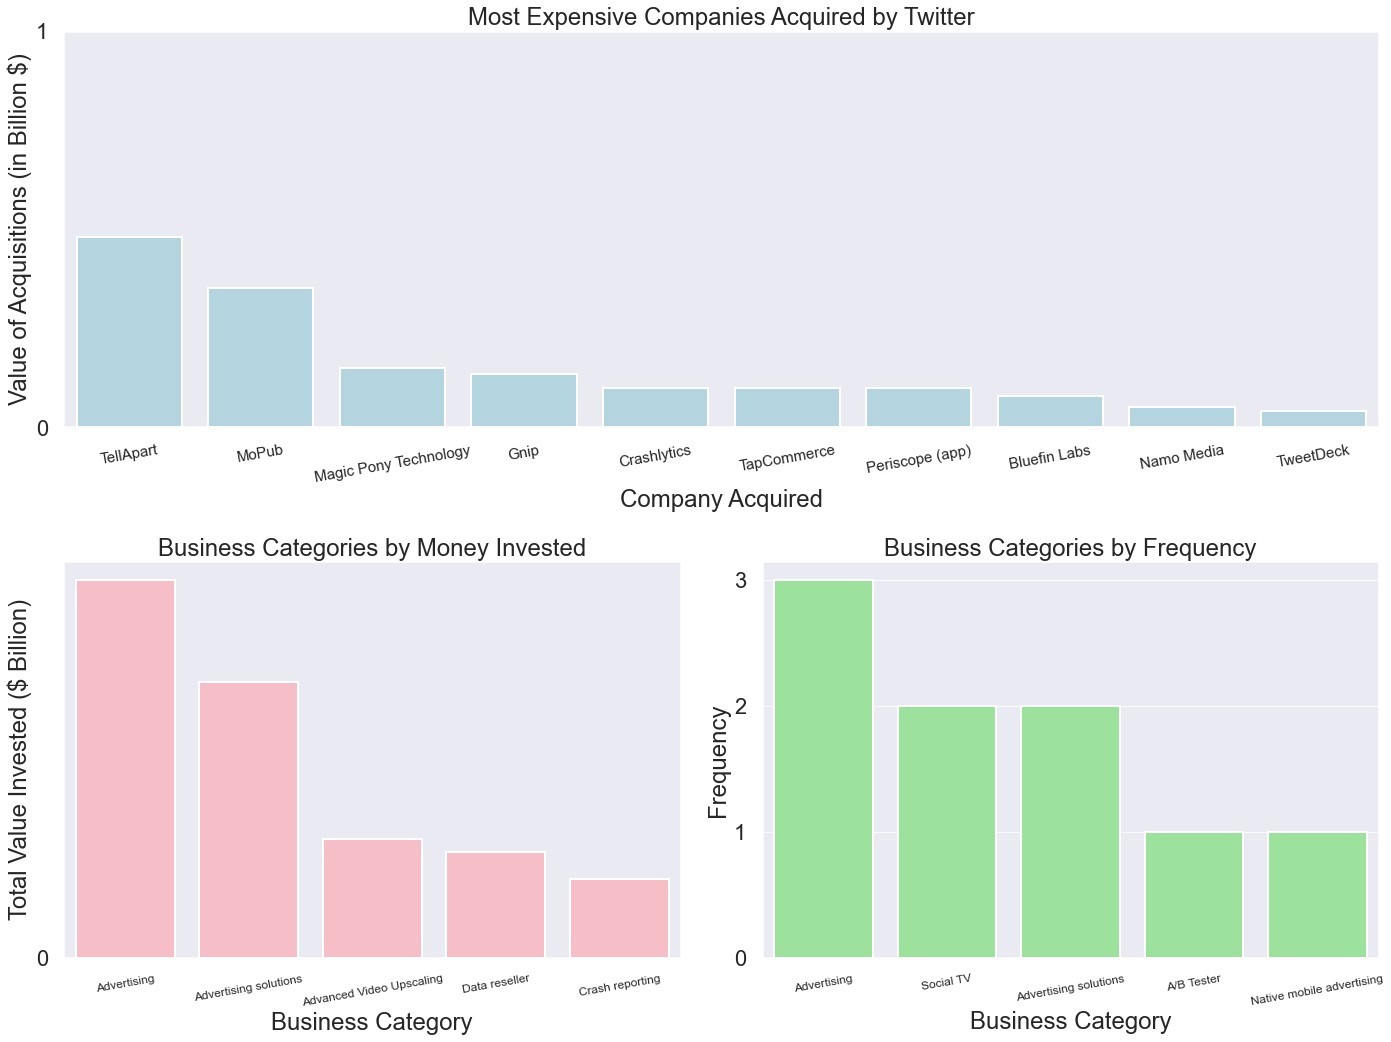

In [19]:
plt.figure(figsize=(20,15))

ax1 = plt.subplot(2,1,1)
stock_acq.top_ten_acq('Twitter', ax1)
plt.tick_params(axis='x', labelsize=15)
plt.xticks(rotation=10)

ax2 = plt.subplot(2,2,3)
stock_acq.business_categories_by_value('Twitter', ax2)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=10)

ax3 = plt.subplot(2,2,4)
stock_acq.business_categories_by_frequency('Twitter', ax3)
ax3.set_yticks(range(0,4,1))
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=10)
plt.tight_layout()

plt.show()
plt.close()

<blockquote> • The acquisitions of Twitter is relatively small, with none of them surpassing \$1 billion. This may be due to the small size of Twitter itself, compared to other tech giants in the industry. <br><br>
    • Many of Twitter's acquisitions focus on advertising as the most of the acquired companies belong to the business category of <b>Advertising and Advertising solutions</b>. This is due to Twitter's continued efforts in increasing its profitability as a social media platform, since it has not yet achieved the economies of scale unlike Facebook has in the same industry.<br><br>
    • Despite its short history and small sizee, however, the yearly average number of acquisitions of Twitter surpasses that of Apple and Facebook, and is almost as large as Yahoo, which means that Twitter has an aggressive acquisition strategy than the other two.<br><br>